In [2]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV4
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [4]:
encoder, autoencoder, sess = autoencoderV4(4)

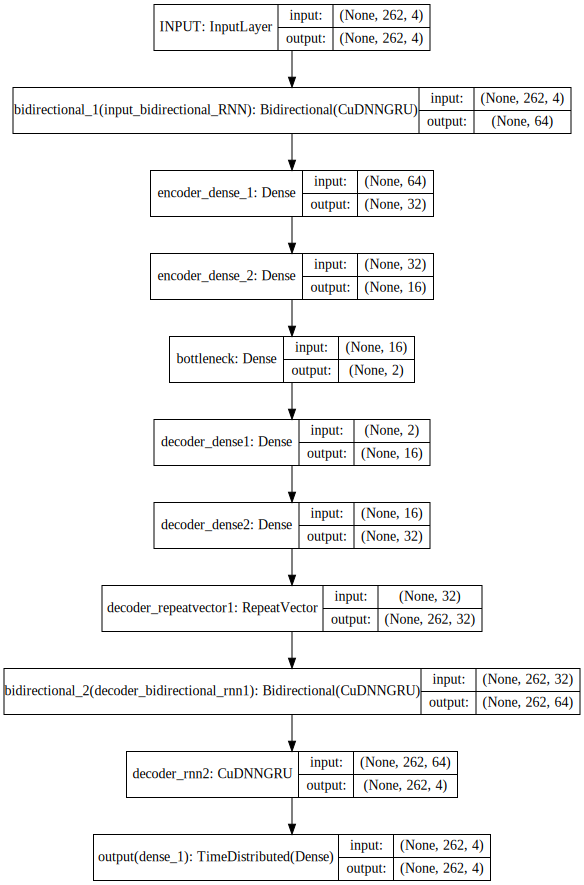

In [5]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
import numpy as np

In [7]:
concat = np.concatenate((VL_encoded_shuffled, VH_encoded_shuffled), axis=1)

In [ ]:
history = autoencoder.fit(concat, concat, 
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint('../model_weights/autoencoderV4/run1/autoencoderV4_allfeatures.hdf5',
                                                                     save_best_only=True),
                                     keras.callbacks.TensorBoard('../logs/autoencoderV4/run1')])

Train on 1706 samples, validate on 427 samples
Epoch 1/2000
1706/1706 [==============================] - 5s 3ms/step - loss: 0.5138 - val_loss: 0.2735
Epoch 2/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2591 - val_loss: 0.2570
Epoch 3/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2569 - val_loss: 0.2567
Epoch 4/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2567 - val_loss: 0.2565
Epoch 5/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2566 - val_loss: 0.2564
Epoch 6/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2564 - val_loss: 0.2563
Epoch 7/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2563 - val_loss: 0.2561
Epoch 8/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2562 - val_loss: 0.2560
Epoch 9/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2561 - val_loss: 0.2559
Epoch 10/2000
170

1706/1706 [==============================] - 3s 2ms/step - loss: 0.2404 - val_loss: 0.2411
Epoch 79/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2404 - val_loss: 0.2473
Epoch 80/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2405 - val_loss: 0.2390
Epoch 81/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2390 - val_loss: 0.2385
Epoch 82/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2394 - val_loss: 0.2391
Epoch 83/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2402 - val_loss: 0.2394
Epoch 84/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2398 - val_loss: 0.2414
Epoch 85/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2384 - val_loss: 0.2410
Epoch 86/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2382 - val_loss: 0.2382
Epoch 87/2000
1706/1706 [==============================] - 3s 2ms/ste

1706/1706 [==============================] - 3s 2ms/step - loss: 0.2267 - val_loss: 0.2254
Epoch 156/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2253 - val_loss: 0.2255
Epoch 157/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2252 - val_loss: 0.2250
Epoch 158/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2247 - val_loss: 0.2253
Epoch 159/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2250 - val_loss: 0.2273
Epoch 160/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2246 - val_loss: 0.2254
Epoch 161/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2247 - val_loss: 0.2248
Epoch 162/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2241 - val_loss: 0.2239
Epoch 163/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2237 - val_loss: 0.2243
Epoch 164/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.2124 - val_loss: 0.2134
Epoch 233/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2117 - val_loss: 0.2130
Epoch 234/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2129 - val_loss: 0.2129
Epoch 235/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2114 - val_loss: 0.2130
Epoch 236/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2117 - val_loss: 0.2128
Epoch 237/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2113 - val_loss: 0.2129
Epoch 238/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2117 - val_loss: 0.2138
Epoch 239/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2132 - val_loss: 0.2179
Epoch 240/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2121 - val_loss: 0.2112
Epoch 241/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1998 - val_loss: 0.2009
Epoch 310/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2008 - val_loss: 0.2038
Epoch 311/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2003 - val_loss: 0.2027
Epoch 312/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2017 - val_loss: 0.2030
Epoch 313/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.2011 - val_loss: 0.2013
Epoch 314/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1982 - val_loss: 0.2013
Epoch 315/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1989 - val_loss: 0.2004
Epoch 316/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1997 - val_loss: 0.1998
Epoch 317/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1988 - val_loss: 0.2003
Epoch 318/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1961 - val_loss: 0.1945
Epoch 387/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1905 - val_loss: 0.1938
Epoch 388/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1913 - val_loss: 0.1941
Epoch 389/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1907 - val_loss: 0.1960
Epoch 390/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1907 - val_loss: 0.1945
Epoch 391/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1913 - val_loss: 0.1933
Epoch 392/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1904 - val_loss: 0.1933
Epoch 393/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1917 - val_loss: 0.1940
Epoch 394/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1902 - val_loss: 0.1947
Epoch 395/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1839 - val_loss: 0.1880
Epoch 464/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1842 - val_loss: 0.1886
Epoch 465/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1858 - val_loss: 0.1920
Epoch 466/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1837 - val_loss: 0.1863
Epoch 467/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1841 - val_loss: 0.1865
Epoch 468/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1853 - val_loss: 0.1878
Epoch 469/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1867 - val_loss: 0.1890
Epoch 470/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1855 - val_loss: 0.1882
Epoch 471/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1834 - val_loss: 0.1879
Epoch 472/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1804 - val_loss: 0.1834
Epoch 541/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1805 - val_loss: 0.1884
Epoch 542/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1806 - val_loss: 0.1847
Epoch 543/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1810 - val_loss: 0.1836
Epoch 544/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1803 - val_loss: 0.1845
Epoch 545/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1811 - val_loss: 0.1838
Epoch 546/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1794 - val_loss: 0.1843
Epoch 547/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1793 - val_loss: 0.1839
Epoch 548/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1804 - val_loss: 0.1894
Epoch 549/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1767 - val_loss: 0.1807
Epoch 618/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1769 - val_loss: 0.1831
Epoch 619/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1766 - val_loss: 0.1810
Epoch 620/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1763 - val_loss: 0.1830
Epoch 621/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1766 - val_loss: 0.1821
Epoch 622/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1772 - val_loss: 0.1801
Epoch 623/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1771 - val_loss: 0.1823
Epoch 624/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1771 - val_loss: 0.1816
Epoch 625/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1780 - val_loss: 0.1848
Epoch 626/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1744 - val_loss: 0.1797
Epoch 695/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1742 - val_loss: 0.1792
Epoch 696/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1757 - val_loss: 0.1845
Epoch 697/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1759 - val_loss: 0.1806
Epoch 698/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1747 - val_loss: 0.1787
Epoch 699/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1738 - val_loss: 0.1808
Epoch 700/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1753 - val_loss: 0.1816
Epoch 701/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1754 - val_loss: 0.1787
Epoch 702/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1781 - val_loss: 0.1974
Epoch 703/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1717 - val_loss: 0.1762
Epoch 772/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1711 - val_loss: 0.1769
Epoch 773/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1711 - val_loss: 0.1778
Epoch 774/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1748 - val_loss: 0.1776
Epoch 775/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1711 - val_loss: 0.1778
Epoch 776/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1718 - val_loss: 0.1778
Epoch 777/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1726 - val_loss: 0.1809
Epoch 778/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1747 - val_loss: 0.1884
Epoch 779/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1724 - val_loss: 0.1764
Epoch 780/2000
1706/1706 [==============================] - 3

1706/1706 [==============================] - 2s 1ms/step - loss: 0.1695 - val_loss: 0.1752
Epoch 849/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1689 - val_loss: 0.1771
Epoch 850/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1704 - val_loss: 0.2179
Epoch 851/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1761 - val_loss: 0.1737
Epoch 852/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1686 - val_loss: 0.1768
Epoch 853/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1685 - val_loss: 0.1741
Epoch 854/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1697 - val_loss: 0.1762
Epoch 855/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1690 - val_loss: 0.1758
Epoch 856/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1699 - val_loss: 0.1742
Epoch 857/2000
1706/1706 [==============================] - 2

1706/1706 [==============================] - 3s 1ms/step - loss: 0.1683 - val_loss: 0.1762
Epoch 926/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1681 - val_loss: 0.1766
Epoch 927/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1700 - val_loss: 0.1736
Epoch 928/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1690 - val_loss: 0.1834
Epoch 929/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1688 - val_loss: 0.1780
Epoch 930/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1684 - val_loss: 0.1747
Epoch 931/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1675 - val_loss: 0.1734
Epoch 932/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1737 - val_loss: 0.1728
Epoch 933/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1667 - val_loss: 0.1730
Epoch 934/2000
1706/1706 [==============================] - 2

1706/1706 [==============================] - 2s 1ms/step - loss: 0.1662 - val_loss: 0.1741
Epoch 1003/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1682 - val_loss: 0.1736
Epoch 1004/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1661 - val_loss: 0.1709
Epoch 1005/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1660 - val_loss: 0.1719
Epoch 1006/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1665 - val_loss: 0.1728
Epoch 1007/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1669 - val_loss: 0.1722
Epoch 1008/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1654 - val_loss: 0.1748
Epoch 1009/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1667 - val_loss: 0.1724
Epoch 1010/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1700 - val_loss: 0.1833
Epoch 1011/2000
1706/1706 [==========================

1706/1706 [==============================] - 3s 1ms/step - loss: 0.1647 - val_loss: 0.1728
Epoch 1079/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1691 - val_loss: 0.1715
Epoch 1080/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1642 - val_loss: 0.1718
Epoch 1081/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1644 - val_loss: 0.1717
Epoch 1082/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1648 - val_loss: 0.1701
Epoch 1083/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1639 - val_loss: 0.1722
Epoch 1084/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1660 - val_loss: 0.1719
Epoch 1085/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1656 - val_loss: 0.1704
Epoch 1086/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1635 - val_loss: 0.1739
Epoch 1087/2000
1706/1706 [==========================

1706/1706 [==============================] - 2s 1ms/step - loss: 0.1632 - val_loss: 0.1705
Epoch 1155/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1638 - val_loss: 0.1700
Epoch 1156/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1635 - val_loss: 0.1682
Epoch 1157/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1626 - val_loss: 0.1710
Epoch 1158/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1645 - val_loss: 0.1710
Epoch 1159/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1627 - val_loss: 0.1698
Epoch 1160/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1628 - val_loss: 0.1700
Epoch 1161/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1630 - val_loss: 0.1708
Epoch 1162/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1646 - val_loss: 0.1693
Epoch 1163/2000
1706/1706 [==========================

1706/1706 [==============================] - 3s 1ms/step - loss: 0.1620 - val_loss: 0.1695
Epoch 1231/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1616 - val_loss: 0.1690
Epoch 1232/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1616 - val_loss: 0.1668
Epoch 1233/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1616 - val_loss: 0.1710
Epoch 1234/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.1616 - val_loss: 0.1708
Epoch 1235/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1619 - val_loss: 0.1686
Epoch 1236/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1654 - val_loss: 0.1684
Epoch 1237/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1612 - val_loss: 0.1678
Epoch 1238/2000
1706/1706 [==============================] - 3s 1ms/step - loss: 0.1615 - val_loss: 0.1698
Epoch 1239/2000
1706/1706 [==========================

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1605 - val_loss: 0.1673
Epoch 1307/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1600 - val_loss: 0.1723
Epoch 1308/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1618 - val_loss: 0.1671
Epoch 1309/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1610 - val_loss: 0.1668
Epoch 1310/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1614 - val_loss: 0.1726
Epoch 1311/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1631 - val_loss: 0.1689
Epoch 1312/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1600 - val_loss: 0.1671
Epoch 1313/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1605 - val_loss: 0.1669
Epoch 1314/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1612 - val_loss: 0.1682
Epoch 1315/2000
1706/1706 [==========================

1706/1706 [==============================] - 3s 2ms/step - loss: 0.1592 - val_loss: 0.1660
Epoch 1383/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1592 - val_loss: 0.1676
Epoch 1384/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1585 - val_loss: 0.1653
Epoch 1385/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1609 - val_loss: 0.1682
Epoch 1386/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1619 - val_loss: 0.1698
Epoch 1387/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1610 - val_loss: 0.1663
Epoch 1388/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1597 - val_loss: 0.1659
Epoch 1389/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1595 - val_loss: 0.1658
Epoch 1390/2000
1706/1706 [==============================] - 3s 2ms/step - loss: 0.1599 - val_loss: 0.1724
Epoch 1391/2000
1706/1706 [==========================